In [8]:
from fastai.vision.all import *
import os

In [2]:
input_path_classic = '/kaggle/input/music-classic'
input_path_electronic = '/kaggle/input/music-electronic'

category = ['classical music', 'electronic music']
path = Path('electronic_music_or_not')

resize_images(input_path_classic, max_size=400, dest=path/category[0], recurse=True)
resize_images(input_path_electronic, max_size=400, dest=path/category[1], recurse=True)

print(f"Photos resized")

Photos resized


In [3]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

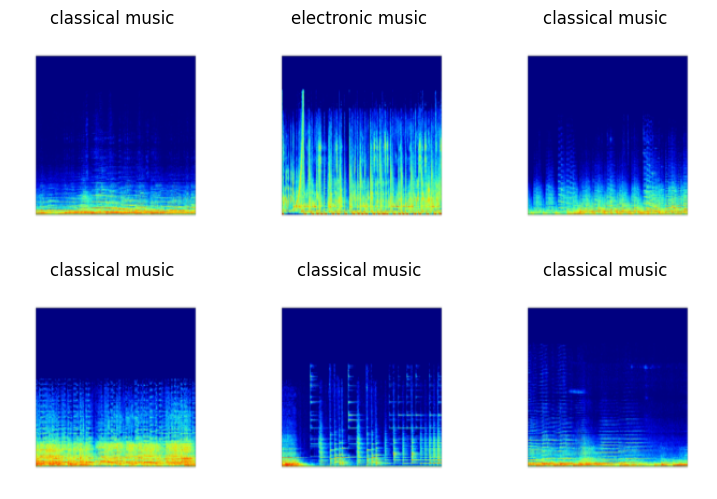

In [4]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
    
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 150MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.896348,4.354504,0.750000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.039032,3.164526,0.750000,00:04
1,0.758973,1.941191,0.750000,00:05
2,0.521016,1.125937,0.625000,00:04
3,0.389209,0.663520,0.250000,00:04
4,0.308521,0.500599,0.125000,00:04


In [12]:
path_test = '/kaggle/input/test-dataset'
a=0

for filename in os.listdir(path_test):

    if filename.endswith(".png"):
        
        file_path = os.path.join(path_test, filename)
        is_electronic_music,_,probs = learn.predict(PILImage.create(file_path))
        print(f"Music number: {a}")
        print(f"Filepath: {file_path}")
        print(f"This is a: {is_electronic_music}.")
        print(f"Probability it's a electronic_music: {probs[1]:.4f}")
        print(f"---------------------------------------------------")
        a = a+1

Music number: 0
Filepath: /kaggle/input/test-dataset/7electronic_music_spectrogram.png
This is a: electronic music.
Probability it's a electronic_music: 0.5339
---------------------------------------------------


Music number: 1
Filepath: /kaggle/input/test-dataset/2classic_music_spectrogram.png
This is a: classical music.
Probability it's a electronic_music: 0.0240
---------------------------------------------------


Music number: 2
Filepath: /kaggle/input/test-dataset/4classic_music_spectrogram.png
This is a: classical music.
Probability it's a electronic_music: 0.2579
---------------------------------------------------


Music number: 3
Filepath: /kaggle/input/test-dataset/9electronic_music_spectrogram.png
This is a: classical music.
Probability it's a electronic_music: 0.2102
---------------------------------------------------


Music number: 4
Filepath: /kaggle/input/test-dataset/1classic_music_spectrogram.png
This is a: classical music.
Probability it's a electronic_music: 0.1400
---------------------------------------------------


Music number: 5
Filepath: /kaggle/input/test-dataset/3classic_music_spectrogram.png
This is a: classical music.
Probability it's a electronic_music: 0.1200
---------------------------------------------------


Music number: 6
Filepath: /kaggle/input/test-dataset/6electronic_music_spectrogram.png
This is a: classical music.
Probability it's a electronic_music: 0.3450
---------------------------------------------------


Music number: 7
Filepath: /kaggle/input/test-dataset/12electronic_music_spectrogram.png
This is a: electronic music.
Probability it's a electronic_music: 0.7761
---------------------------------------------------


Music number: 8
Filepath: /kaggle/input/test-dataset/11electronic_music_spectrogram.png
This is a: electronic music.
Probability it's a electronic_music: 0.5037
---------------------------------------------------


Music number: 9
Filepath: /kaggle/input/test-dataset/0classic_music_spectrogram.png
This is a: classical music.
Probability it's a electronic_music: 0.0184
---------------------------------------------------


Music number: 10
Filepath: /kaggle/input/test-dataset/8electronic_music_spectrogram.png
This is a: electronic music.
Probability it's a electronic_music: 0.7179
---------------------------------------------------


Music number: 11
Filepath: /kaggle/input/test-dataset/5classic_music_spectrogram.png
This is a: classical music.
Probability it's a electronic_music: 0.0162
---------------------------------------------------


Music number: 12
Filepath: /kaggle/input/test-dataset/10electronic_music_spectrogram.png
This is a: electronic music.
Probability it's a electronic_music: 0.5035
---------------------------------------------------


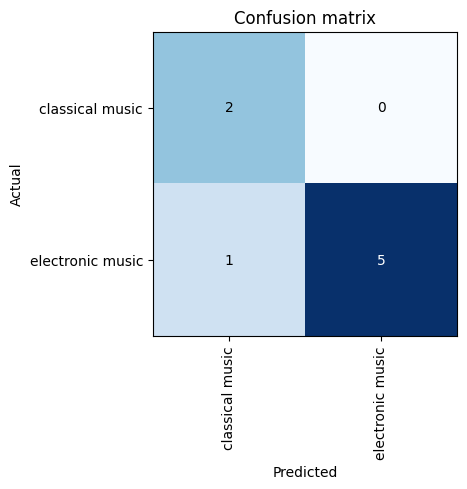

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

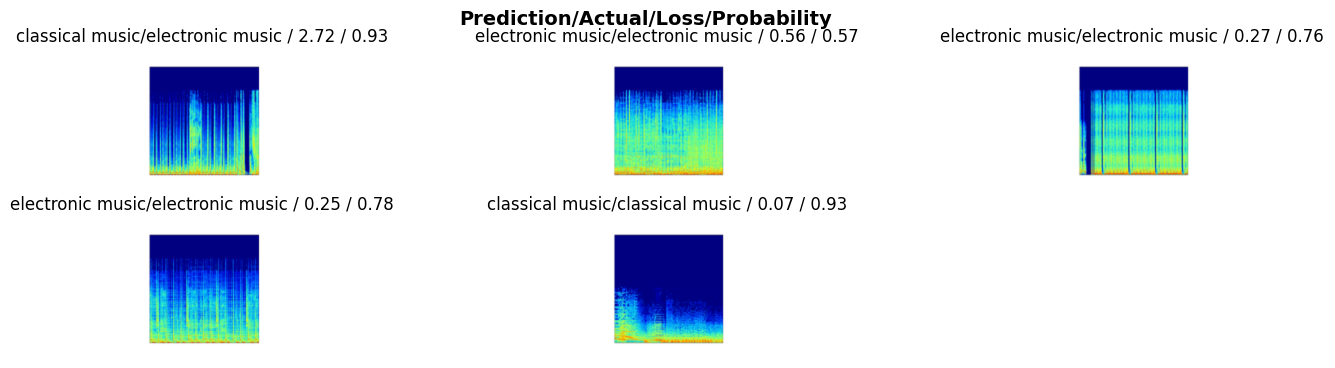

In [15]:
interp.plot_top_losses(5, nrows=2, figsize=(17,4))

In [17]:
learn.export('model.pkl')